EDA - Exploratory Data Analysis.
 - Como transformar dados em informação útil e com significado para o negócio

- entendendo as variáveis
- limpando o conjunto de dados
- analisando as relações entre dados

In [1]:
#Importando as bibliotecas para fazer o EDA
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Verificando a estrutura dos dados
train_DF = pd.read_csv(r"C:\Users\Fernando Costa\Desktop\Arquivos Lucas\DS\Projetos GITHUB\Titanic\Base_dados\train.csv") 
train_DF.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Executando uma limpeza básica dos dados, excluindo as colunas que não auxiliam na predição de nada:
train_DF = train_DF.drop(columns=["PassengerId", "Name", "Ticket"])

• Verificando a presença de dados nulos/faltantes na base de dados, além da verificação dos Dtypes, observando se os dados foram corretamente interpretatos pelo pandas.

In [3]:
display(train_DF.info())
display(train_DF.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


None

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [4]:
print(f"Existem {177/891*100:.2f}% de dados faltantes na coluna de idade e {687/891*100:.2f}% na coluna de Cabine.")
print(f"A coluna Pclass está mal compreendida, pois apesar de um número, 3 não é necessariamente melhor do que 2. As outras colunas apresentam dados coerentes.")

Existem 19.87% de dados faltantes na coluna de idade e 77.10% na coluna de Cabine.
A coluna Pclass está mal compreendida, pois apesar de um número, 3 não é necessariamente melhor do que 2. As outras colunas apresentam dados coerentes.


• Verificando as médias, dispersões, quartis e possíveis outliers da base de dados, a fim de observar melhor os parâmetros numéricos e guiar as próximas etapas como o próprio pré processamento:


In [5]:
train_DF.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


A coluna "Parch" e "Fare" são possíveis candidatos à presença de outliers, necessário observar a distribuição desses dados posteriormente.

• Analisando a distribuição da idade dos passageiros em relação a classe de suas passagens:

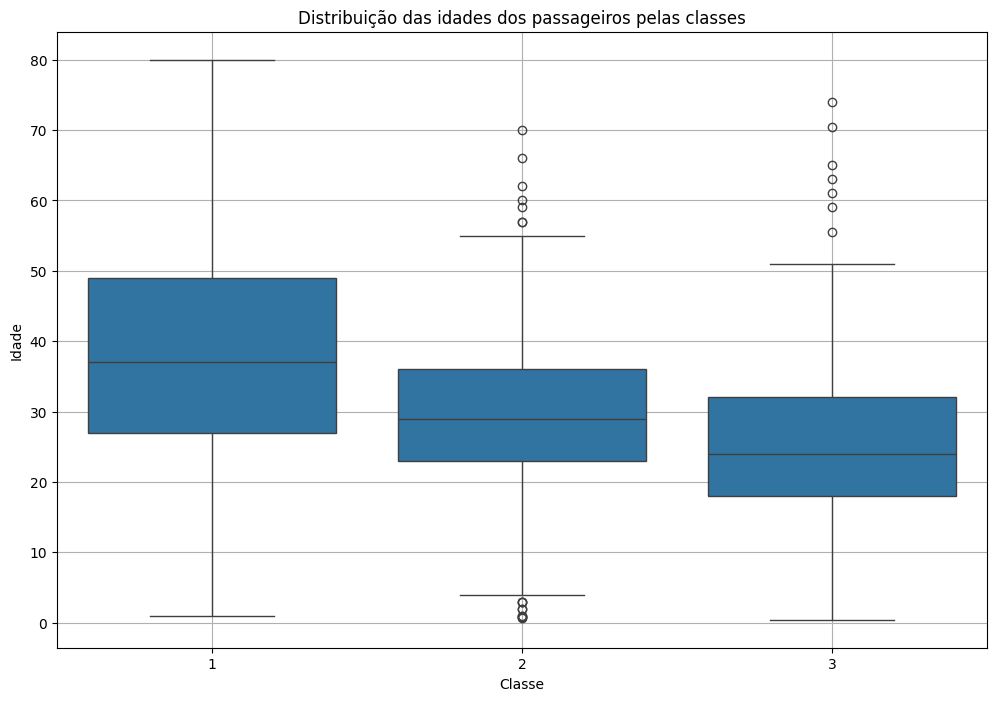

In [6]:
# Analisando as médias de idade de cada classe social
plt.figure(figsize=(12,8))
sns.boxplot(data= train_DF, x = "Pclass", y = "Age")
plt.grid(True)
plt.title('Distribuição das idades dos passageiros pelas classes')
plt.xlabel('Classe')
plt.ylabel('Idade')
plt.show()

Verifica-se que a média de idade por classe social segue um certo padrão, pessoas da primeira classe são mais velhas do que comparadas às da segunda classe, que por sua vez são mais velhas que as pessoas da terceira classe.

• Agora, observando a distribuição de idade de todos os passageiros e dos que sobreviveram:

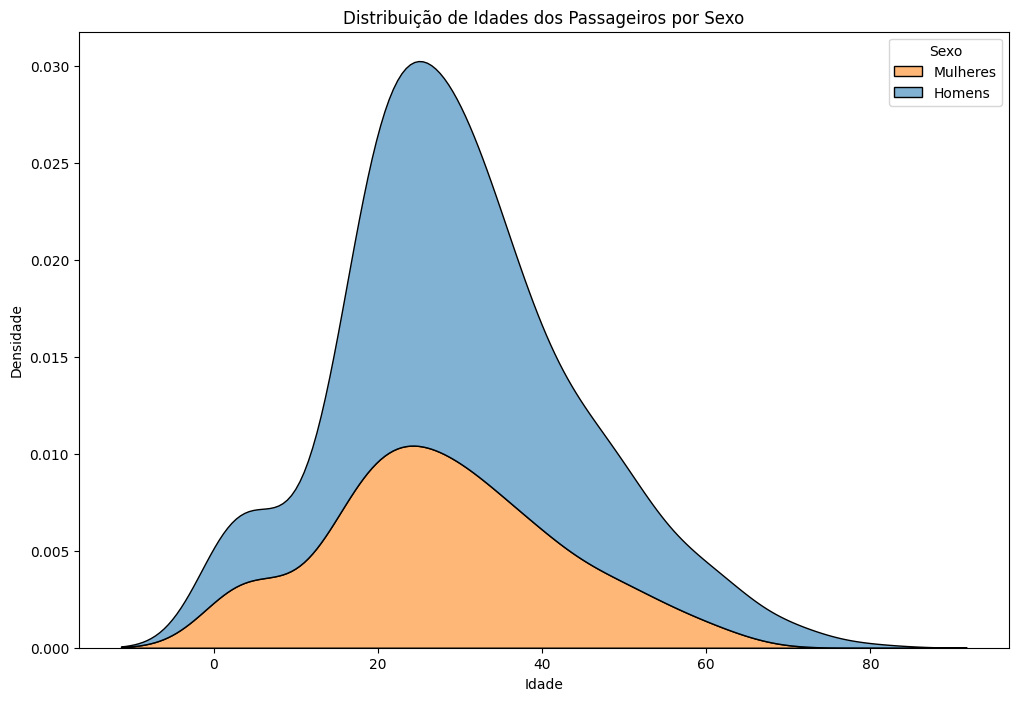

In [37]:
# Criando uma paleta de cores para os gráficos.
custom_palette = {"male": "#5799C6", "female": "#FF9F4B"}

# Criando o gráfico kdeplot
plt.figure(figsize=(12,8))
graph = sns.kdeplot(data=train_DF, x="Age", hue="Sex", multiple="stack", palette= custom_palette)

# Configurações do gráfico
plt.title('Distribuição de Idades dos Passageiros por Sexo')
plt.xlabel('Idade')
plt.ylabel('Densidade')
#plt.legend()
#plt.legend(title='Sexo', loc='upper right')
graph.legend(title='Sexo', labels=['Mulheres', 'Homens'], loc='upper right')
# Exibir o gráfico
plt.show()

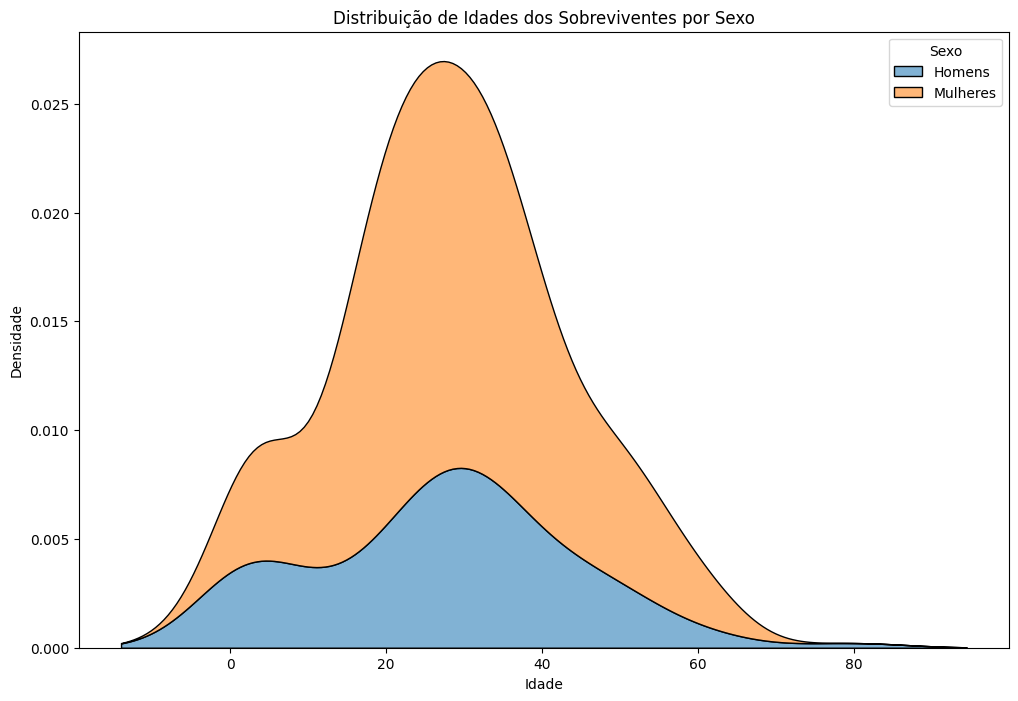

In [31]:
# Criando o gráfico kdeplot
survivors = train_DF.loc[train_DF["Survived"] == 1]
custom_palette = {"male": "#5799C6", "female": "#FF9F4B"}

plt.figure(figsize=(12,8))
graph = sns.kdeplot(data=survivors, x="Age", hue="Sex", multiple="stack", palette= custom_palette)

# Configurações do gráfico
plt.title('Distribuição de Idades dos Sobreviventes por Sexo')
plt.xlabel('Idade')
plt.ylabel('Densidade')
graph.legend(title='Sexo', labels= ["Homens", "Mulheres"] , loc='upper right')
# Exibir o gráfico
plt.show()

Nota-se que sobreviveram muito mais mulheres em todas as faixas etárias do que homens.

• Observando agora, de modo mais geral, a comparação % de sobrevivencia entre os sexos para tentar identificar se há relação direta entre esses fatores:

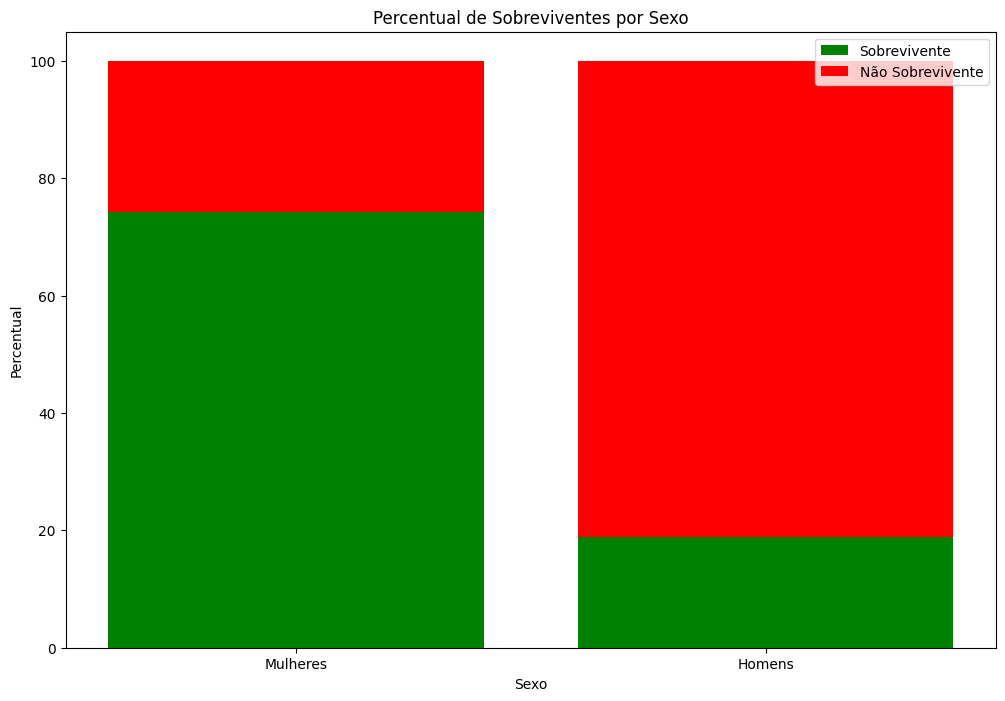

In [38]:
fig, ax = plt.subplots(figsize=(12, 8))
survival_percent = train_DF.groupby('Sex')['Survived'].value_counts(normalize=True).unstack() * 100

# Definindo as barras para homens e mulheres
bar_index = range(len(survival_percent))

# Plotagem das barras
bars1 = ax.bar(bar_index, survival_percent[1], label='Sobrevivente', color='green')
bars2 = ax.bar(bar_index, survival_percent[0], bottom=survival_percent[1], label='Não Sobrevivente', color='red')

# Adicionando detalhes ao gráfico
ax.set_xlabel('Sexo')
ax.set_ylabel('Percentual')
ax.set_title('Percentual de Sobreviventes por Sexo')
ax.set_xticks(bar_index)
ax.set_xticklabels(["Mulheres", 'Homens'])
ax.legend(loc='upper right')  # Movendo a legenda para o canto superior direito
plt.show()

Nota-se que sobreviveram muito mais mulheres do que homens neste evento, apesar da quantidade total de homens ser muito maior. Isso pode ser causado pela prioridade em evacuar o navio.

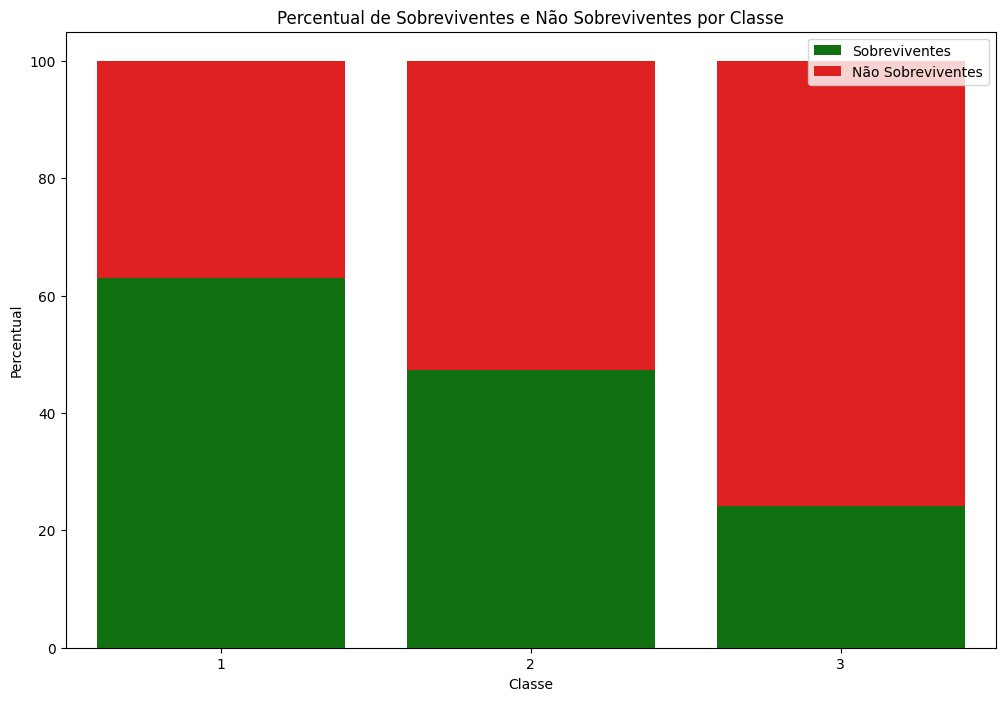

In [10]:
# Calculando os percentuais de sobreviventes e não sobreviventes por classe
# Quantidade total de sobreviventes por classe
total_per_class = train_DF.groupby('Pclass')['Survived'].count()
# Dividindo sobreviventes por classe pelo total de passageiros da classe
percent_survived_per_class = train_DF.groupby('Pclass')['Survived'].mean() * 100
# Complementar dos sobreviventes pro classe
percent_not_survived_per_class = 100 - percent_survived_per_class

# Criando o gráfico
plt.figure(figsize=(12,8))
sns.barplot(x=total_per_class.index, y=percent_survived_per_class, color='green', label='Sobreviventes')
sns.barplot(x=total_per_class.index, y=percent_not_survived_per_class, bottom=percent_survived_per_class, color='red', label='Não Sobreviventes')
plt.title('Percentual de Sobreviventes e Não Sobreviventes por Classe')
plt.xlabel('Classe')
plt.ylabel('Percentual')
plt.legend()
plt.show()


É possível notar que, a primeira classe teve uma taxa de mais de 60% de sobrevivência, e que é possível que tenham tido certa prioridade ao deixar o Titanic, seguida da classe 2 com pouco mais de 40% e por ultimo, a classe que mais passageiros não sobreviveram foi a classe 3, em que sobreviveram pouco mais de 20%.

É possível observar que sobreviveram mais mulheres em todas as faixas etárias de modo geral.

<Axes: xlabel='SibSp', ylabel='count'>

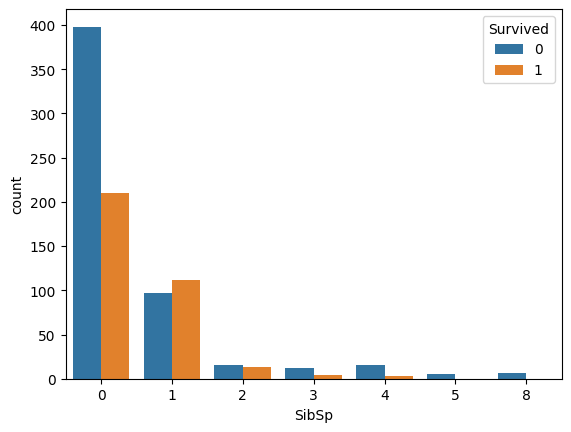

In [42]:
sns.countplot(data=train_DF, x= "SibSp", hue="Survived")

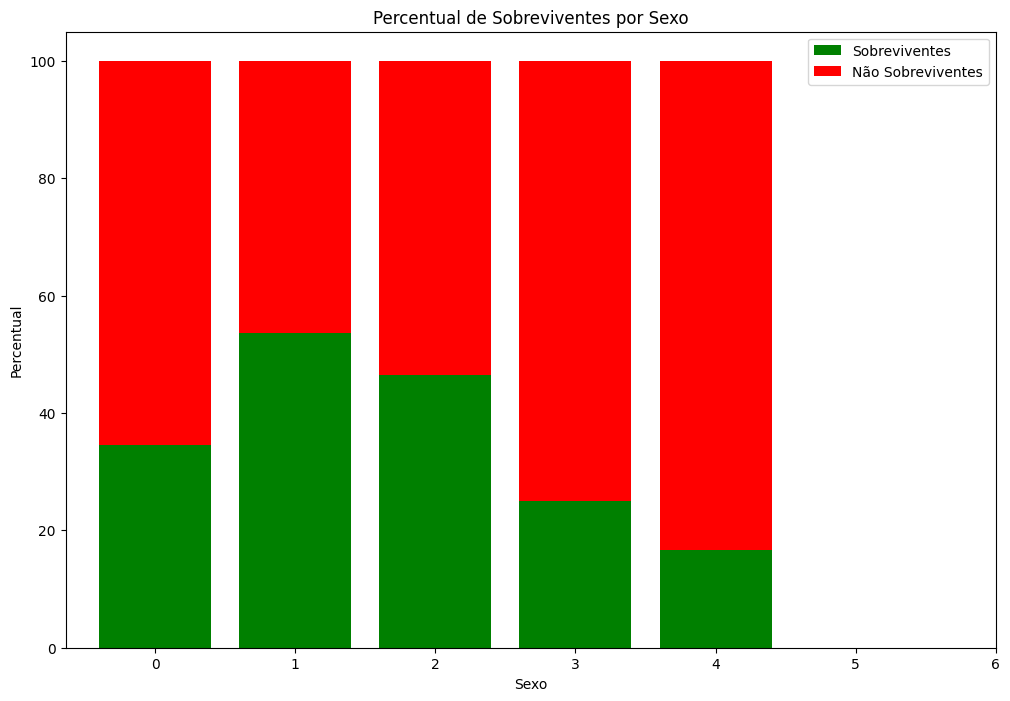

In [41]:
# Observando se há relação entre Irmãos ou conjuge e sobrevivencia
#sns.countplot(data=train_DF, x= "SibSp", hue="Survived")

fig, ax = plt.subplots(figsize=(12, 8))
survival_percent = train_DF.groupby('SibSp')['Survived'].value_counts(normalize=True).unstack() * 100

# Definindo as barras para cada parametro
bar_index = range(len(survival_percent),)

# Plotagem das barras
bars1 = ax.bar(bar_index, survival_percent[1], label='Sobreviventes', color='green')
bars2 = ax.bar(bar_index, survival_percent[0], bottom=survival_percent[1], label='Não Sobreviventes', color='red')

# Adicionando detalhes ao gráfico
ax.set_xlabel('Sexo')
ax.set_ylabel('Percentual')
ax.set_title('Percentual de Sobreviventes por Sexo')
ax.set_xticks(bar_index)
#ax.set_xticklabels(["Mulheres", 'Homens'])
ax.legend(loc='upper right')  # Movendo a legenda para o canto superior direito
plt.show()

É possível notar que a maioria das pessoas não tinham irmãos ou conjuges a bordo do navio. Porém, quem tinha o número 1 ou 2 nesse tipo de dado, tiveram uma taxa maior de sobrevivência.

<Axes: xlabel='Parch', ylabel='count'>

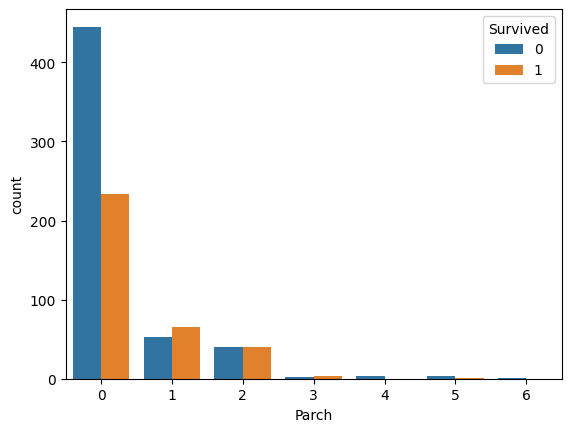

In [15]:
# Observando se há relação entre Pais ou Filhos e sobrevivencia
sns.countplot(data=train_DF, x= "Parch", hue="Survived")

A maioria das pessoas não estavam a bordo com pais ou filhos, mas observando os que estavam, tiveram uma taxa de sobrevivência muito maior, desconsiderando os passageiros com 4 ou mais nesse tipo de dado

<Axes: xlabel='Embarked', ylabel='count'>

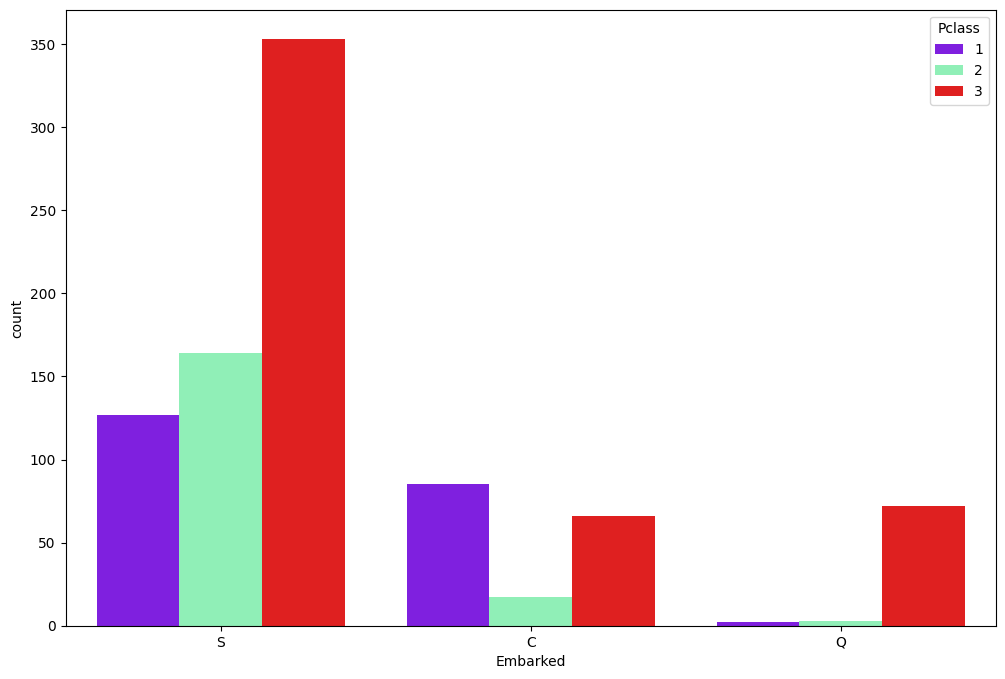

In [16]:
# Observando 
plt.figure(figsize=(12,8))
sns.countplot(data= train_DF, x= "Embarked", hue = "Pclass", palette= "rainbow")

#sns.lmplot(data = train_DF, x = "Fare", y = "Survived")

A grande maioria das pessoas embarcou no porto S, principalmente as da terceira classe. Menos da metade dos passageiros da primeira classe embarcaram também no porto C, e a grande maioria dos passageiros que embarcaram no porto Q eram da terceira classe.

<Axes: xlabel='Fare', ylabel='Count'>

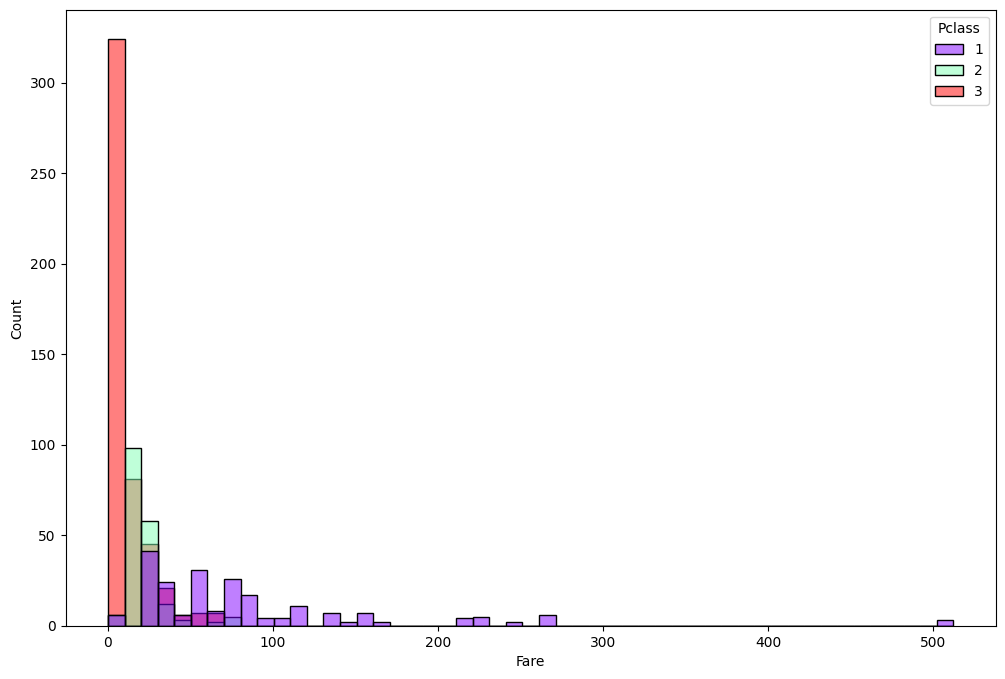

In [17]:
# Observando a distribuição dos preços das passagens
plt.figure(figsize=(12,8))
sns.histplot(data= train_DF, x= "Fare",binwidth= 10, hue= "Pclass", palette= "rainbow")
#aumentar figura e kde

A grande maioria dos passageiros não pagou pela passagem, e eram da terceira classe. A classe que pagou mais caro em suas passagens era da primeira classe.

<Axes: xlabel='Age', ylabel='Count'>

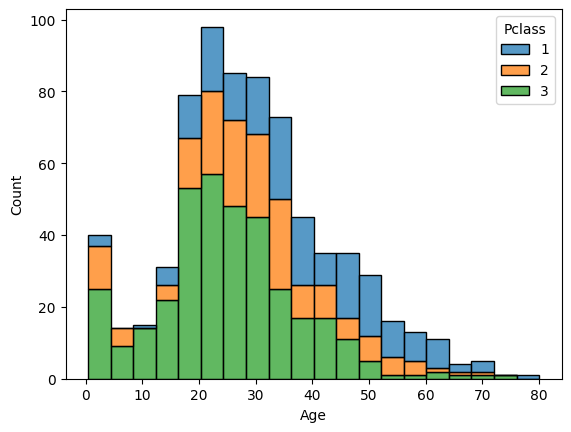

In [18]:
#Checando a relação entre idade e classe
sns.histplot(data= train_DF, x = "Age", hue= "Pclass", palette= "tab10" , multiple= "stack")

In [19]:
# Observando se há relação entre cabines vazias e classe social
cabines_nulas = train_DF.loc[train_DF["Cabin"] == -1]
cabines_nulas["Pclass"].value_counts()


Series([], Name: count, dtype: int64)

Text(0.5, 1.0, 'Cabines Nulas')

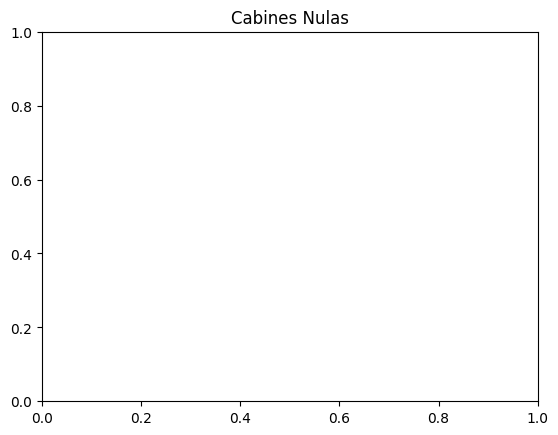

In [20]:
# Visualizando a relação entre a sobrevivência ou não sobrevivência às cabines nulas
sns.countplot(data= cabines_nulas, x = "Pclass", hue= "Survived").set_title("Cabines Nulas")


A maioria das cabines nulas pertencem a terceira classe, que foi a mais afetada pelo naufrágio do Titanic. Apesar disso, algumas pessoas da primeira e segunda classes também não tinham cabines definidas

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

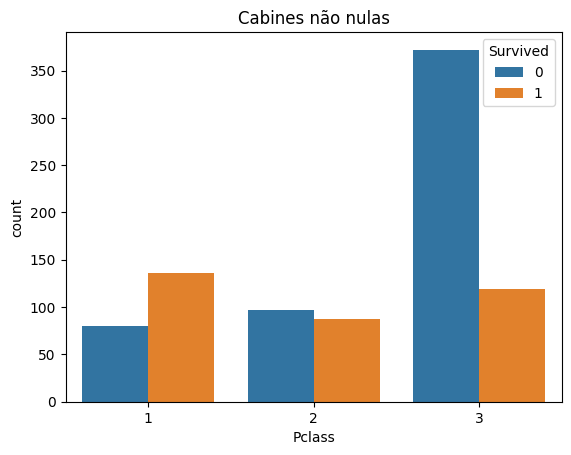

In [21]:
cabines_nao_nulas = train_DF.loc[train_DF["Cabin"] != -1]
sns.countplot(data= cabines_nao_nulas, x = "Pclass", hue= "Survived").set_title("Cabines não nulas")

cabines_nao_nulas["Pclass"].value_counts()

A Grande maioria dos tickets que tinham cabines definidas eram da 1ª classe, enquanto a maioria da segunda e terceira classe não tinham especificação de cabines

In [22]:
train_DF.head(10) #regex (futuramente)
#trazer graficos com %, direcionamento de pensamento
#principais insights, conclusão

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
5,0,3,male,NaN,0,0,8.4583,NaN,Q
6,0,1,male,54.0,0,0,51.8625,E46,S
7,0,3,male,2.0,3,1,21.0750,NaN,S
8,1,3,female,27.0,0,2,11.1333,NaN,S
9,1,2,female,14.0,1,0,30.0708,NaN,C


In [23]:
#proximos passos: feature engineer, o valor da taxa / media da taxa da classe (pós train split), taxa * SibSp
# pre processamento - tratamento de nulos, encoders, novas variaveis,
# entrada da base original -> pre processamento -> base de saida preparada para modelagem

# modificações do EDA que devem ser realizadas: 
# colocar graficos reflativizados (%), trazer graficos KDE, aprender sobre, escrever mais sobre o porque de cada coisa. 
# Preenchimento de missing values deve ser movido para o notebook de pre processing 

## Conclusão

